# Hyper Spectral Anomaly Detection
## Image Data Tutorial

In [18]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path = "../"
sys.path.append(path)
from sklearn.preprocessing import MaxAbsScaler
import matplotlib.image as mpimg

from PIL import Image
from loguru import logger
import Model as hsa_model
import DataSet as hsa_dataset
import Viz as hsa_viz
from torch.utils.data import DataLoader

logger.remove()
logger.add(sink=f"HSA_log.log", level="CRITICAL")
import MultiFilter as hsa_multifilter

## Image 
Read Images and plot shape of np.array associated with it. 

In [19]:
image_path = "./night_sky.jpeg"
img = Image.open(image_path)
array = np.array(img)
print(f"array shape: {array.shape}")

array shape: (1280, 1280, 3)


Plot images of the RGB spectra and original data as np before conversion to df. 

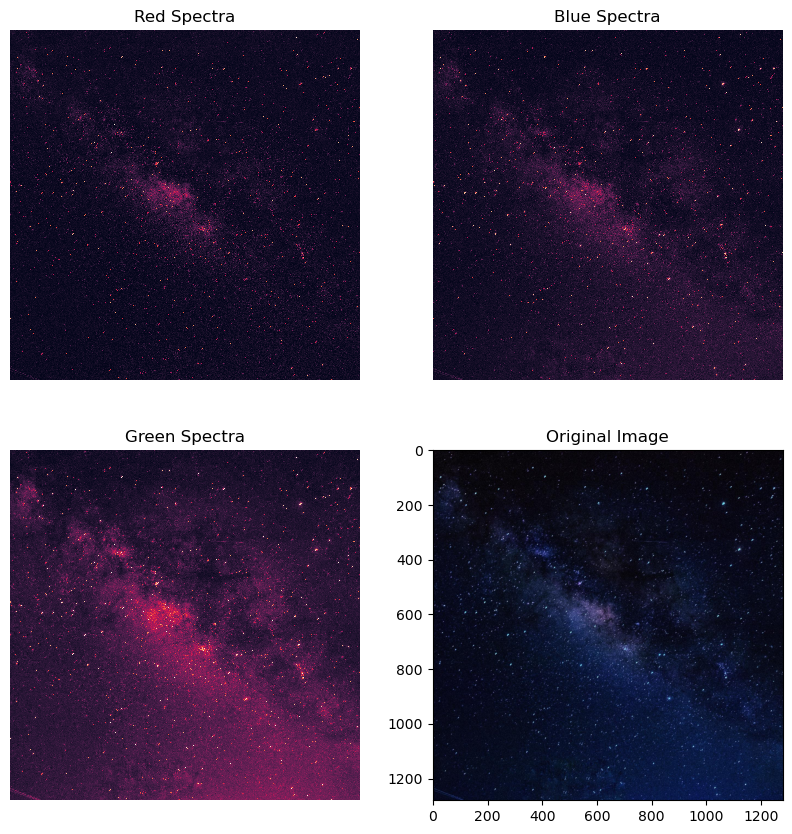

In [20]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
titles = ["Red Spectra", "Blue Spectra", "Green Spectra", "Original Image"]
for i, ax in enumerate(axs.flat):
    try:
        sns.heatmap(
            array[:, :, i],
            square=True,
            xticklabels=False,
            yticklabels=False,
            cbar=False,
            ax=ax,
        )
        ax.set_title(titles[i])
    except:
        ax.set_title(titles[i])
        image = mpimg.imread(image_path)
        ax.imshow(image)

Generate a list of data points from image and convert to df to begin vanilla preprocessing.

In [21]:
data = None
columns = ["red", "green", "blue"]

for row in range(len(array)):
    try:
        data = np.append(data, array[row, :, :], axis=0)
    except:
        data = array[row, :, :]

scaler = MaxAbsScaler()
scaler.fit(data)
preprocessed_df = pd.DataFrame(scaler.transform(data), columns=columns)

## Instantiate
Instantiate the model and dataloader with preprocessed data as a np.array()

In [22]:
anomaly_std_tolerance = 1.2
penalty_ratio = 0.75
cutoff_distance = 2
converge_toll=1e-5,

batch_size = 1000
iterations = 10000

model = hsa_model.HSA_model(
    penalty_ratio = penalty_ratio,
    cutoff_distance = cutoff_distance,
    converge_toll = converge_toll,
    anomaly_std_tolerance = anomaly_std_tolerance,
    logger=logger,
    affinity_matrix_iterations = 20,
    lr = 2.7,
    multifilter_flag = 0,
)
dataset = hsa_dataset.HSA_dataset(
    preprocessed_np=preprocessed_df.to_numpy(), logger=logger
)
dataloader = DataLoader(dataset, batch_size=batch_size)

In [17]:
# import sys
# path = "../"
# sys.path.append(path)
# import Pipeline
# from loguru import logger
# import pandas as pd 

# penalty_ratio = 0.9
# cutoff_distance = 1.2
# lr = 2.7
# anomaly_std_tolerance = 1.2
# bin_count = 3
# max_spawn_dummies = 30
# percent_variance_explained = 1
# min_additional_percent_variance_exp = 0
# logging_level = "TRACE"

# pipe = Pipeline.HSA_pipeline(
#     penalty_ratio,
#     cutoff_distance,
#     lr,
#     anomaly_std_tolerance,
#     bin_count,
#     max_spawn_dummies,
#     percent_variance_explained,
#     min_additional_percent_variance_exp,
#     logger=logger,
#     logging_level="DEBUG",
#     base_directory="./",
#     num_workers=0,
#     unique_id_str= ""
# )

# pipe.pipeline(preprocessed_df, 1)